In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [199]:
data = pd.read_csv("/Users/shashank/MyFiles/ProgrammingFiles/Datasets/Instagram data.csv", encoding="ISO-8859-1")

Here we used encoding="ISO-8859-1" since its not in utf8 encoded

In [200]:
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [201]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

checking for null values 

In [202]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

Clean data set no need to drop null values

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


From here we visualize and analyze data using seaborn and matplotlib

Here are Impressions from Home

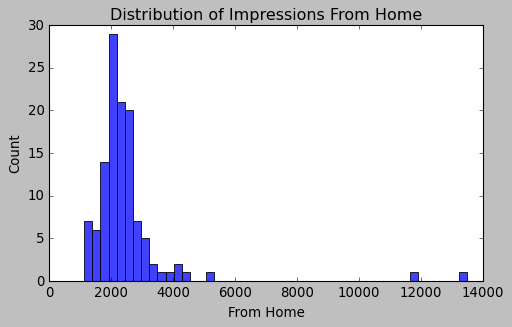

In [204]:
plt.figure(figsize=(7, 4))
plt.title("Distribution of Impressions From Home")
sn.histplot(data['From Home'])
plt.show()

Its very difficult for this instagram user to reach all his daily followers

Here are Impressions from hashtags

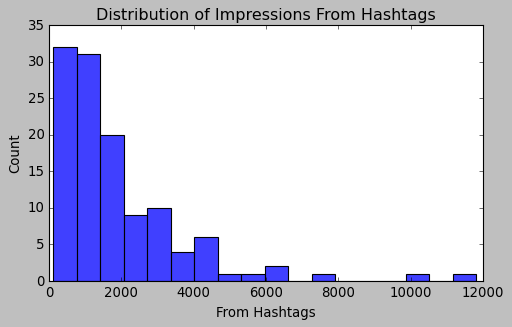

In [205]:
plt.figure(figsize=(7,4))
plt.title("Distribution of Impressions From Hashtags")
sn.histplot(data['From Hashtags'])
plt.show()

Here are Impressions from Explore

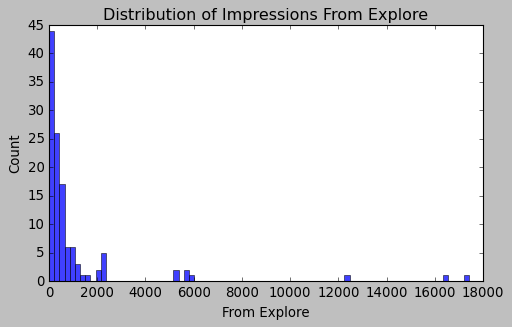

In [206]:
plt.figure(figsize=(7,4))
plt.title("Distribution of Impressions From Explore")
sn.histplot(data['From Explore'])
plt.show()

Here are Impressions from Explore

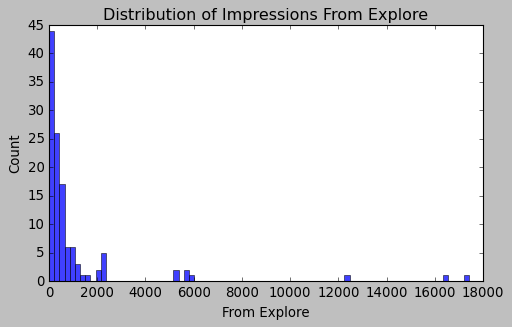

In [207]:
plt.figure(figsize=(7,4))
plt.title("Distribution of Impressions From Explore")
sn.histplot(data['From Explore'])
plt.show()

For pie chart we need to calculate the sum of each columns

In [208]:
home_sum = data['From Home'].sum()
hashtags_sum = data['From Hashtags'].sum()
explore_sum = data['From Explore'].sum()
other_sum = data['From Other'].sum()

labels = ['From Home','From Hashtags','From Explore','From Other']
values = [home_sum,hashtags_sum,explore_sum,other_sum]

figur = px.pie(data,values=values,names=labels,title= 'Impressions on Instagram Posts from Various Sources')
figur.show()

Caption and hashtags, which will help us understand the kind of content the user posts on Instagram

Creating a wordcloud of caption column to look at the most used words in the caption of my Instagram posts

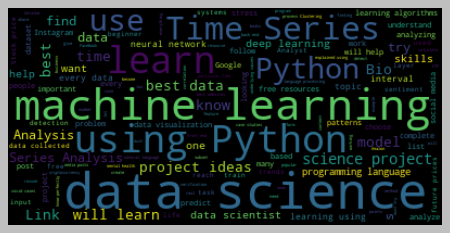

In [209]:
txt = " ".join(i for i in data.Caption)
stopwrd = set(STOPWORDS) # gives words like shown below
wordCloud = WordCloud(stopwords=stopwrd).generate(txt)
plt.figure(figsize=(7,4))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

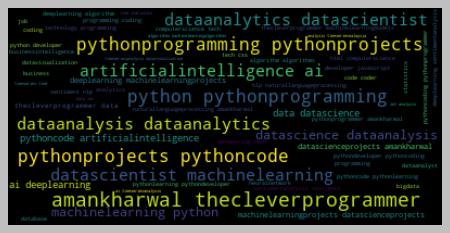

In [210]:
txt1 = " ".join(i for i in data.Hashtags)
stopwrd1 = set(STOPWORDS) # gives words like shown below
wordCloud1 = WordCloud(stopwords=stopwrd1).generate(txt1)
plt.figure(figsize=(7,4))
plt.imshow(wordCloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

Analysing Relationships

relationship between the number of likes and the number of impressions on the users Instagram posts

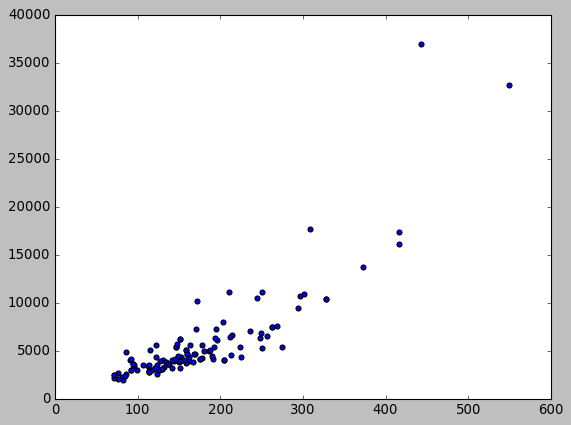

In [211]:
plt.scatter(data['Likes'],data['Impressions'])
plt.show()

In [212]:
figur = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figur.show()

linear relationship between the number of likes and the reach the user got on Instagram

relationship between the number of comments and the number of impressions on the users Instagram posts

In [213]:
figur = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figur.show()

the number of comments we get on a post doesn’t affect its reach

relationship between the number of shares and the number of impressions

In [214]:
figur = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figur.show()

more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do

relationship between the number of saves and the number of impressions

In [215]:
figur = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figur.show()

Linear relationship between the number of times my post is saved and the reach of the users Instagram post

The correlation of all the columns wrt Impressions

In [216]:
corre = data.corr()
print(corre["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


More likes and saves will help you get more reach on Instagram
and Higher number of shares will also help you get more reach, but a low number of shares will not affect your reach either.

Relationship between the total profile visits and the number of followers gained from all profile visits

In [217]:
figur = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figur.show()

This has linear relationship

# Building a machine learning model to predict the reach of an instagram post

In [218]:
X = np.array(data[['Likes','Saves','Comments','Shares','Profile Visits','Follows']])
y = np.array(data[['Impressions']])
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [222]:
parModel = PassiveAggressiveRegressor()
parModel.fit(X_train,y_train)
par_pred = parModel.predict(X_test)

Predicting with a few values

In [223]:
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
parModel.predict(features)

array([12068.29619704])

In [225]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [229]:
model.predict(features)

array([11508.45764638])

In [230]:
model.coef_

array([ 17.76089533,   4.43000453, -94.47297569, -14.19603648,
         6.61466201,  73.17238944])